In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import glob
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Create and test the video sequence for the Car4 dataset
vid_seq = []
size_main = (0,0)
# Iterate through all the images with .jpg extension
for file in glob.glob('/content/drive/My Drive/CV_4/Car/img/*.jpg'):
    print(file) 
    #Read the images sequentially and append them in the vid_seq list
    img = cv2.imread(file)
    height, width, layers = img.shape
    size = (width, height)
    size_main = size
    vid_seq.append(img)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('Car.avi',fourcc,5.0,size_main)

for i in range(len(vid_seq)):
    out.write(vid_seq[i])
out.release()

/content/drive/My Drive/CV_4/Car/img/0126.jpg
/content/drive/My Drive/CV_4/Car/img/0302.jpg
/content/drive/My Drive/CV_4/Car/img/0409.jpg
/content/drive/My Drive/CV_4/Car/img/0146.jpg
/content/drive/My Drive/CV_4/Car/img/0487.jpg
/content/drive/My Drive/CV_4/Car/img/0237.jpg
/content/drive/My Drive/CV_4/Car/img/0393.jpg
/content/drive/My Drive/CV_4/Car/img/0533.jpg
/content/drive/My Drive/CV_4/Car/img/0280.jpg
/content/drive/My Drive/CV_4/Car/img/0555.jpg
/content/drive/My Drive/CV_4/Car/img/0205.jpg
/content/drive/My Drive/CV_4/Car/img/0057.jpg
/content/drive/My Drive/CV_4/Car/img/0027.jpg
/content/drive/My Drive/CV_4/Car/img/0502.jpg
/content/drive/My Drive/CV_4/Car/img/0179.jpg
/content/drive/My Drive/CV_4/Car/img/0552.jpg
/content/drive/My Drive/CV_4/Car/img/0618.jpg
/content/drive/My Drive/CV_4/Car/img/0168.jpg
/content/drive/My Drive/CV_4/Car/img/0089.jpg
/content/drive/My Drive/CV_4/Car/img/0071.jpg
/content/drive/My Drive/CV_4/Car/img/0437.jpg
/content/drive/My Drive/CV_4/Car/i

In [66]:
# Create and test the video sequence for the Bolt dataset

vid_seq = []
size_main = (0,0)
# Iterate through all the images with .jpg extension

for file in glob.glob('/content/drive/My Drive/CV_4/Bolt/img/*.jpg'):
    # Read the images sequentially and append them in the vid_seq list
    global size_main
    print(file)
    img = cv2.imread(file)
    height, width, layers = img.shape
    size = (width,height)
    size_main = size
    vid_seq.append(img)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('Bolt.avi',fourcc,5.0,size_main)

for i in range(len(vid_seq)):
    out.write(vid_seq[i])
out.release()

/content/drive/My Drive/CV_4/Bolt/img/0181.jpg
/content/drive/My Drive/CV_4/Bolt/img/0255.jpg
/content/drive/My Drive/CV_4/Bolt/img/0035.jpg
/content/drive/My Drive/CV_4/Bolt/img/0151.jpg
/content/drive/My Drive/CV_4/Bolt/img/0102.jpg
/content/drive/My Drive/CV_4/Bolt/img/0053.jpg
/content/drive/My Drive/CV_4/Bolt/img/0290.jpg
/content/drive/My Drive/CV_4/Bolt/img/0072.jpg
/content/drive/My Drive/CV_4/Bolt/img/0234.jpg
/content/drive/My Drive/CV_4/Bolt/img/0163.jpg
/content/drive/My Drive/CV_4/Bolt/img/0085.jpg
/content/drive/My Drive/CV_4/Bolt/img/0132.jpg
/content/drive/My Drive/CV_4/Bolt/img/0012.jpg
/content/drive/My Drive/CV_4/Bolt/img/0125.jpg
/content/drive/My Drive/CV_4/Bolt/img/0036.jpg
/content/drive/My Drive/CV_4/Bolt/img/0051.jpg
/content/drive/My Drive/CV_4/Bolt/img/0248.jpg
/content/drive/My Drive/CV_4/Bolt/img/0064.jpg
/content/drive/My Drive/CV_4/Bolt/img/0241.jpg
/content/drive/My Drive/CV_4/Bolt/img/0153.jpg
/content/drive/My Drive/CV_4/Bolt/img/0216.jpg
/content/driv

## Implementation of the Lucas Kanade metod for Affine Warp

Warp the image $I$ to obtain $I(W[x,y];P)$

Compute the error image $T(x)-I(W[x,y];P)$

Warp the Gradient ${\nabla{I}}$ with $(W[x,y];P)$

Evaluate $\frac{\partial W}{\partial P}$ at $([x,y];P)$

Compute Steepest descent images ${\nabla{I}}\frac{\partial W}{\partial P}$

Compute the Hessian Matrix $\sum{({\nabla{I}}\frac{\partial W}{\partial P})}^{T}{{\nabla{I}}\frac{\partial W}{\partial P}}$

Compute $\sum{({\nabla{I}}\frac{\partial W}{\partial P})}{(T(x)-I(W[x,y];P))}$

Compute ${\Delta P}$

$P{\leftarrow}P+{\Delta P}$

Keep Iterating till the magnitude of ${\Delta P}$ is negligible

And also ${\Delta P} = {({A}^{T}{A}})^{-1}{A^{T}}{b}$

Here ${{A}^{T}{A}}$ is the Hessian Matrix that has been computed above and $A$ is the steepest descent image and $b$ is basicallty the error image that has been computed in step 2

Affine Transform is given as ${\begin{bmatrix} 1+{p_1} & {p_3} & {p_5}\\ {p_2} & {1+{p_4}} & {p_{6}}\\0&0&1\\\end{bmatrix}}$

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform
import glob
%matplotlib inline

# Get a grayscale image to input in the Lucas Kanade 
def get_grayscale_image(image):
    
    """
    Inputs:
    path_to_frame: The path to the frame that needs to be converted to a grayscale image: dtype=string
    
    """
    grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    grayscale = cv2.GaussianBlur(grayscale, (3, 3),0)  
    return grayscale

# Reference: CMU Graduate computer Vision Course
def crop_warped(image,rect):
    
    """
    Inputs:
    image: The warped image after performing an affine transformation
    rect: The upleft and the truth bounding box
    
    """
    #warped = image[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
    warped = image[rect[1]:rect[3], rect[0]:rect[2]]
    return warped
    
def LucasKanadeAffine(image,template,rect,p,threshold, iterations):
    
    """
    Inputs:
    
    image: The input gray scale image
    template: The template image
    rect: The top left coordinates and the bottom right coordinates of the rectangle format--> [x1,y1,x2,y2]
    threshold: The threshold that has been set to terminate the iterations as soon as delta p value approaches the threshold value
    parameters: The initial parameters of the affine warp
    iterations: Number of times the algorithm needs to run
    
    Returns:
    p: Paramters of the affine warp matrix
    Upper left bounding bax coordinates
    Downright bounding box coordinates
    """
    # Crop the region of interest from the template frame
    template = crop_warped(template,rect)
    
    # Parameters of the affine matrix
    #p = np.array([parameters]).reshape(-1,1)
    
    # Threshold for convergence
    thresh = threshold
    
    # Initial Affine Matrix
    #affine_matrix = np.array([[1.0,0.0,0.0],[0.0,1.0,0.0]])
    
    # affine matrix
    affine_matrix = np.array([[1 + p[0][0], p[2][0], p[4][0]], [p[1][0], 1 + p[3][0], p[5][0]]], dtype = np.float32)
    
    #I = affine_matrix
    # Compute the image gradient in the x direction
    sobelx = cv2.Sobel(image, cv2.CV_64F, dx = 1, dy = 0, ksize = 7)
    
    # Compute the image gradient in the y direction
    sobely = cv2.Sobel(image, cv2.CV_64F, dx = 0, dy = 1, ksize = 7)
    
    for iteration in range(iterations):
        
        # Warp the input image
        warped_image = cv2.warpAffine(image, affine_matrix, (0, 0), flags=cv2.INTER_NEAREST + cv2.WARP_INVERSE_MAP)
        
        # Compute the error image
        error_image = template - crop_warped(warped_image, rect)
        
        # Compute the warped gradient in the x direction
        sobel_x_warped = cv2.warpAffine(sobelx, affine_matrix, (0,0), flags=cv2.INTER_NEAREST + cv2.WARP_INVERSE_MAP)
        
        # Crop the Region of interest in our image gradient
        sobel_x_cropped = crop_warped(sobel_x_warped, rect)
        
        # Compute the warped gradient in the y direction
        sobel_y_warped = cv2.warpAffine(sobely, affine_matrix, (0,0), flags=cv2.INTER_CUBIC + cv2.WARP_INVERSE_MAP)
        
        # Crop the Region of interest in our image gradient
        sobel_y_cropped = crop_warped(sobel_y_warped, rect)
        
        # Flatten out the warped gradients
        sobel_x_cropped = sobel_x_cropped.reshape(-1,1)
        sobel_y_cropped = sobel_y_cropped.reshape(-1,1)
        
        # Warp the image gradient with the warping function to produce an mx2 matrix
        # Horizontally stack the derivatives
        gradient_image_warped = np.hstack((sobel_x_cropped,sobel_y_cropped))
        
        # Evaluate the Jacobian and the steepest descent 
        count = 0
        steepest_descent = []
        for y in range(rect[1],rect[3]):
            for x in range(rect[0],rect[2]):
                
                Jacobian = [x*sobel_x_cropped[count][0], x*sobel_y_cropped[count][0], y*sobel_x_cropped[count][0], y*sobel_y_cropped[count][0], sobel_x_cropped[count][0], sobel_y_cropped[count][0]]
                steepest_descent.append(Jacobian)
                count = count + 1
        steepest_descent = np.array(steepest_descent)
        
        # Calculate the Hessian and inverse hessian from the steepest descent
        sd_params_update = np.dot(steepest_descent.T,error_image.reshape(-1,1))
        hessian = np.dot(steepest_descent.T,steepest_descent)
        hessian_inverse = np.linalg.pinv(hessian)
        
        # Update delta p using solution for least squares
        delta_p = np.dot(hessian_inverse, sd_params_update)
        
        # Update the parameters p
        p = np.reshape(p, (6, 1))
        p = p + delta_p
        #print(f'After Iteration: {iterations} Value of p: {p}')
        
        # Update the affine matrix with the newly generated parameters
        #affine_matrix = p.reshape(2,3) + I
        
        # Convergence test
        if np.linalg.norm(delta_p) <= thresh:
            break
            
    # Updated affine matrix
    affine_matrix = np.array([[(1 + p[0][0]), (p[2][0]), (p[4][0])], [(p[1][0]), (1 + p[3][0]), (p[5][0])]], dtype = np.float32)
    top_left_coordinates = np.array([[rect[0]],[rect[1]],[1]])
    bottom_right_coordinates = np.array([[rect[2]], [rect[3]], [1]])
    updated_top_left_coordinates = np.dot(affine_matrix, top_left_coordinates)
    updated_bottom_right_coordinates = np.dot(affine_matrix, bottom_right_coordinates)
    
    print(f'top_left: {updated_top_left_coordinates} \tbottom_right:{updated_bottom_right_coordinates}')
    return p, updated_top_left_coordinates, updated_bottom_right_coordinates


In [68]:
rect_car = np.array([70,51,107+70,87+51])
rect_bolt = np.array([269,75,303,139])

# Create and test the video sequence for the Bolt dataset

files  = glob.glob('/content/drive/My Drive/CV_4/Bolt/img/*.jpg')

# grayscale template image
template = cv2.imread(files[0])
grayscale_template = get_grayscale_image(template)

# List to append the frame sequences
vid_seq = []

p = np.array([[0, 0, 0, 0, 0, 0]]).T

# Iterate through all the images with .jpg extension
for file in files:
    
    image = cv2.imread(file)
    image_copy = image.copy()
    
    # Input the gray scale image
    grayscale_image = get_grayscale_image(image_copy)
    
    # Run the Lucas Kanade Algorithm
    p, top_left_coordinates, bottom_right_coordinates = LucasKanadeAffine(grayscale_image,grayscale_template,rect_bolt, p,threshold = 0.001, iterations = 35)
    
    # Create a bounding box
    image = cv2.rectangle(image,(int(top_left_coordinates[0][0]),int(top_left_coordinates[1][0])), (int(bottom_right_coordinates[0][0]), int(bottom_right_coordinates[1][0])), (0, 0, 255), 1)
    
    vid_seq.append(image)

# The fourcc code
fourcc = cv2.VideoWriter_fourcc(*'XVID')

# Video writer object
out = cv2.VideoWriter('Bolt.avi',fourcc,20.0, (480, 270))

for i in range(len(vid_seq)):
    out.write(vid_seq[i])
out.release()

top_left: [[269.]
 [ 75.]] 	bottom_right:[[303.]
 [139.]]
top_left: [[268.94888949]
 [ 74.96714693]] 	bottom_right:[[303.11703852]
 [139.05302393]]
top_left: [[268.72721397]
 [ 74.88691649]] 	bottom_right:[[303.37254718]
 [139.15312468]]
top_left: [[268.73384178]
 [ 74.91143429]] 	bottom_right:[[303.36620368]
 [139.13362542]]
top_left: [[268.71887971]
 [ 74.95398158]] 	bottom_right:[[303.33819745]
 [139.07714844]]
top_left: [[268.66678261]
 [ 74.88902719]] 	bottom_right:[[303.35077503]
 [139.17384649]]
top_left: [[268.73679823]
 [ 74.91748276]] 	bottom_right:[[303.84442964]
 [138.69672009]]
top_left: [[268.70869554]
 [ 74.89621123]] 	bottom_right:[[303.9570244 ]
 [138.75918304]]
top_left: [[268.68659174]
 [ 74.77973546]] 	bottom_right:[[304.00718813]
 [138.86662122]]
top_left: [[269.03420496]
 [ 74.91876255]] 	bottom_right:[[304.27485955]
 [138.86638881]]
top_left: [[268.97161486]
 [ 74.88368244]] 	bottom_right:[[304.34880092]
 [138.89646119]]
top_left: [[269.30219626]
 [ 74.76347713]]

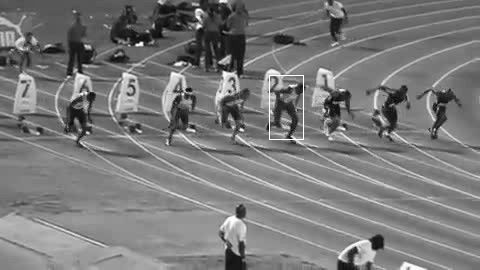

64

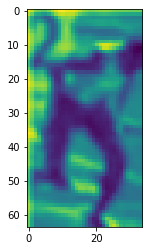

In [75]:
from google.colab.patches import cv2_imshow
frame1 = cv2.imread('/content/drive/My Drive/CV_4/Bolt/img/0001.jpg',0)
frame2 = cv2.imread('/content/drive/My Drive/CV_4/Car/img/0001.jpg',0)
rect_car = [70,51,107+70,87+51]
rect_bolt = np.array([269,75,34+269,64+75])

frame1_copy = frame1.copy()
frame1_copy = cv2.rectangle(frame1_copy,(rect_bolt[0],rect_bolt[1]),(rect_bolt[2],rect_bolt[3]),color = (255,0,0),thickness = 1)
template = frame1_copy[rect_bolt[1]:rect_bolt[3],rect_bolt[0]:rect_bolt[2]]
template = cv2.GaussianBlur(template, (3, 3),0)
cv2_imshow(frame1_copy)
plt.imshow(template)
frame1.shape
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)
template.shape[0]

In [76]:
frame1 = cv2.imread('/content/drive/My Drive/CV_4/Bolt/img/0001.jpg',0)
frame1.shape

(270, 480)

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform, shift
import glob
%matplotlib inline

# Get a grayscale image to input in the Lucas Kanade 
def get_grayscale_image(image):
    
    """
    Inputs:
    path_to_frame: The path to the frame that needs to be converted to a grayscale image: dtype=string
    
    """
    grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    grayscale = cv2.GaussianBlur(grayscale, (5, 5),2.5)  
    #grayscale = cv2.bilateralFilter(grayscale,5,75,75)
    return grayscale

# Reference: CMU Graduate computer Vision Course
def crop_warped(image,rect):
    
    """
    Inputs:
    image: The warped image after performing an affine transformation
    rect: The upleft and the truth bounding box
    
    """
    #warped = image[rect[1]:rect[1]+rect[3],rect[0]:rect[0]+rect[2]]
    warped = image[rect[1]:rect[3], rect[0]:rect[2]]
    return warped

# update the grayscale image, that is, normalize the pixel values with template image
def update_grayscale_image(template_image, image):
    """
    Inputs:
    
    template_image: the template grayscale image whose ROI is given to us
    image: the current grayscale frame 
    
    Outputs:
    
    image: the normalized current grayscale frame
    """
    
    # get the mean of the template image and current frame and normalize
    template_mean = np.mean(template_image)
    mean = np.mean(image)
    image = (image * (template_mean / mean)).astype(float)
    
    # return the normalized current grayscale frame
    return image

# The inverse Compositional Lucas Kanade Algorithm
def LucasKanadeInverseCompositional(template, image, rect, rect_template, affine_matrix, threshold, iterations):
    
    """
    Inputs:
    
    image: The input gray scale image
    template: The template image
    rect: The top left coordinates and the bottom right coordinates of the rectangle format--> [x1,y1,x2,y2]
    threshold: The threshold that has been set to terminate the iterations as soon as delta p value approaches the threshold value
    parameters: The initial parameters of the affine warp
    iterations: Number of times the algorithm needs to run
    
    Returns:
    
    p: Paramters of the affine warp matrix
    Upper left bounding bax coordinates
    Downright bounding box coordinates
    
    """
    # Threshold for convergence
    thresh = threshold
    
    # Crop the Region of interest in our template
    template = crop_warped(template, rect_template)
    
    # Evaluation of the template gradient 
    # Compute the image gradient in the x direction
    sobelx_template = cv2.Sobel(template, cv2.CV_64F, dx = 1, dy = 0, ksize = 7)
        
    # Compute the image gradient in the y direction
    sobely_template = cv2.Sobel(template, cv2.CV_64F, dx = 0, dy = 1, ksize = 7)
    
    # Horizontally stack the obtained Template gradients
    # Flatten out the warped gradients
    sobelx_template = sobelx_template.reshape(-1,1)
    sobely_template = sobely_template.reshape(-1,1)
    
    # Template Gradient
    template_gradient = np.hstack((sobelx_template,sobely_template))
    
    I = affine_matrix
    
    # Evaluate the Jacobian and the steepest descent 
    count = 0
    steepest_descent = []
    for y in range(rect[1],rect[3]):
        for x in range(rect[0],rect[2]):
                
            Jacobian = [x*sobelx_template[count][0], x*sobely_template[count][0], y*sobelx_template[count][0], y*sobely_template[count][0], sobelx_template[count][0], sobely_template[count][0]]
            steepest_descent.append(Jacobian)
            count = count + 1
    steepest_descent = np.array(steepest_descent)
    
    # Evaluate the Hessian Matrix
    hessian = np.matmul(steepest_descent.T,steepest_descent)
    
    for iterations in range(iterations):
        
        # Warp the Input Image
        warped_image = cv2.warpAffine(crop_warped(image,rect), affine_matrix, (crop_warped(image,rect).shape[1],crop_warped(image,rect).shape[0]))
        
        # Compute the error image
        error_image = (warped_image) - template
        
        # Update the steepest descent parameters
        sd_params_update = np.matmul(steepest_descent.T, error_image.reshape(-1,1))
        
        #Compute delta p
        delta_p = np.matmul(np.linalg.pinv(hessian),sd_params_update)
        delta_p = 2*delta_p
        #Compute the updated Warp matrix
        affine_warp_delta_p = np.vstack([delta_p.reshape(2,3) + I,[0,0,1]])
        updated_warp_matrix = np.matmul(affine_matrix, np.linalg.inv(affine_warp_delta_p))
        
        # Convergence test
        if np.linalg.norm(delta_p) <= thresh:
            break
    top_left_coordinates = np.array([[rect[0]],[rect[1]],[1]])
    bottom_right_coordinates = np.array([[rect[2]], [rect[3]], [1]])
    updated_top_left_coordinates = np.matmul(updated_warp_matrix, top_left_coordinates)
    updated_bottom_right_coordinates = np.matmul(updated_warp_matrix, bottom_right_coordinates)
    
    print(f'top_left: {updated_top_left_coordinates} \tbottom_right:{updated_bottom_right_coordinates}')
    return updated_warp_matrix, updated_top_left_coordinates, updated_bottom_right_coordinates

In [79]:
rect_car = np.array([70,51,107+70,87+51])
rect_bolt_template = np.array([359,104,393,168])
rect_bolt = np.array([269,75,303,139])

# Create and test the video sequence for the Bolt dataset

files  = glob.glob('/content/drive/My Drive/CV_4/Bolt/img/*.jpg')

# grayscale template image
template = cv2.imread(files[277])
grayscale_template = get_grayscale_image(template)

# List to append the frame sequences
vid_seq = []

# affine matrix
affine_matrix = np.array([[1.0,0.0,0.0],[0.0,1.0,0.0]], dtype = np.float32)

# Iterate through all the images with .jpg extension
for file in files:
    
    image = cv2.imread(file)
    image_copy = image.copy()
    
    # Input the gray scale image
    grayscale_image = get_grayscale_image(image_copy)
    
    # Update Gray scale image
    grayscale_image = update_grayscale_image(grayscale_template, grayscale_image)
    # Run the Lucas Kanade Algorithm
    affine_matrix, top_left_coordinates, bottom_right_coordinates = LucasKanadeInverseCompositional(grayscale_template,grayscale_image,rect_bolt, rect_bolt_template, affine_matrix, threshold = 0.001, iterations = 28)
    
    # Create a bounding box
    image = cv2.rectangle(image,(int(top_left_coordinates[0][0]),int(top_left_coordinates[1][0])), (int(bottom_right_coordinates[0][0]), int(bottom_right_coordinates[1][0])), (0, 0, 255), 2)
    
    vid_seq.append(image)

# The fourcc code
fourcc = cv2.VideoWriter_fourcc(*'XVID')

# Video writer object
out = cv2.VideoWriter('Bolt.avi',fourcc,10.0, (480, 270))

for i in range(len(vid_seq)):
    out.write(vid_seq[i])
out.release()

top_left: [[268.99726761]
 [ 75.42915829]] 	bottom_right:[[303.00053567]
 [139.81149147]]
top_left: [[269.12716628]
 [ 67.71950669]] 	bottom_right:[[303.14556273]
 [125.5215316 ]]
top_left: [[268.88915854]
 [ 83.29226756]] 	bottom_right:[[302.86219793]
 [154.32468407]]
top_left: [[269.01335052]
 [ 74.38339949]] 	bottom_right:[[303.01980085]
 [137.88458691]]
top_left: [[269.0395649 ]
 [ 72.53551272]] 	bottom_right:[[303.05358803]
 [134.48342118]]
top_left: [[269.02328393]
 [ 72.15209488]] 	bottom_right:[[303.01875853]
 [133.68758105]]
top_left: [[269.00021744]
 [ 74.93306617]] 	bottom_right:[[303.00092379]
 [138.88013784]]
top_left: [[269.07523717]
 [ 70.28080462]] 	bottom_right:[[303.08337052]
 [130.24610385]]
top_left: [[269.00324834]
 [ 74.58000322]] 	bottom_right:[[303.00273259]
 [138.21465237]]
top_left: [[268.98638228]
 [ 75.75670047]] 	bottom_right:[[302.98479313]
 [140.40688062]]
top_left: [[269.04537325]
 [ 72.89660929]] 	bottom_right:[[303.05560201]
 [135.12593483]]
top_left: 

In [90]:
rect_car = np.array([70,51,107+70,87+51])
rect_bolt = np.array([269,75,307,143])
rect_car_template = np.array([359,104,393,168])

# Create and test the video sequence for the Bolt dataset

files  = glob.glob('/content/drive/My Drive/CV_4/Car/img/*.jpg')

# grayscale template image
template = cv2.imread(files[0])
grayscale_template = get_grayscale_image(template)

# List to append the frame sequences
vid_seq = []

# affine matrix
affine_matrix = np.array([[1.0,0.0,0.0],[0.0,1.0,0.0]], dtype = np.float32)

# Iterate through all the images with .jpg extension
for file in files:
    
    image = cv2.imread(file)
    image_copy = image.copy()
    
    # Input the gray scale image
    grayscale_image = get_grayscale_image(image_copy)
    
    # Update Gray scale image
    grayscale_image = update_grayscale_image(grayscale_template, grayscale_image)
    
    # Run the Lucas Kanade Algorithm
    affine_matrix, top_left_coordinates, bottom_right_coordinates = LucasKanadeInverseCompositional(grayscale_template,grayscale_image,rect_car,rect_car, affine_matrix, threshold = 0.001, iterations = 35)
    
    # Create a bounding box
    image = cv2.rectangle(image,(int(top_left_coordinates[0][0]),int(top_left_coordinates[1][0])), (int(bottom_right_coordinates[0][0]), int(bottom_right_coordinates[1][0])), (0, 0, 255), 1)
    
    vid_seq.append(image)

# The fourcc code
fourcc = cv2.VideoWriter_fourcc(*'XVID')

# Video writer object
out = cv2.VideoWriter('Car.avi',fourcc,20.0, (360, 240))

for i in range(len(vid_seq)):
    out.write(vid_seq[i])
out.release()

IndexError: ignored